```
Name: Train&Validation.ipynb
Description: Train and validation proposed NEtwork
Author: Behzad Valipour Sh. behzad.valipour@outlook.com
Date: 04.09.2022
```

```

lines (17 sloc)  1.05 KB
MIT License
Copyright (c) 2022 Behzad Valipour Sh.
Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:
The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.
THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.
```

In [18]:
from src import LoadImageData, TurbinModelNet
import torch
import pytorch_lightning as pl
from torch.utils.data import DataLoader
from pytorch_lightning.callbacks import ModelCheckpoint
from pytorch_lightning.callbacks.early_stopping import EarlyStopping
import torchvision.transforms as T

from sklearn.metrics import classification_report,roc_curve,precision_recall_curve,roc_auc_score ,confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns

from tqdm import tqdm
from random import sample
import numpy as np
import os,sys

# Load data

In [4]:
composed_train = T.Compose([T.RandomHorizontalFlip(),
                            T.RandomVerticalFlip(),
                            T.ToTensor()])

In [5]:
train_data = LoadImageData('../data/train/train_data.csv',transform=composed_train)
validation_data = LoadImageData('../data/val/val_data.csv')
test_data = LoadImageData('../data/val/test_data.csv')

In [6]:
# Constants
n_epochs = 20
batch_size = 64

In [7]:
train_loader = DataLoader(dataset=train_data,batch_size=batch_size,shuffle=True,num_workers=10,pin_memory=True)
validation_loader = DataLoader(dataset=validation_data,batch_size=batch_size,shuffle=False,num_workers=10,pin_memory=True)
test_loader = DataLoader(dataset=test_data,batch_size=batch_size,shuffle=False,num_workers=10,pin_memory=True)

# Train the Model

In [8]:
m = TurbinModelNet()

In [9]:
inPut = torch.rand(1,3,128,128)

In [10]:
m.forward(inPut).shape

torch.Size([1, 1])

In [14]:
model = TurbinModelNet()
ckpt_dir = "/scicore/home/roeoesli/valipo0000/training/turbin/model"
early_stop_callback = EarlyStopping(monitor="validation_Loss_epoch", patience=5,min_delta=0.008, verbose=True, mode="min")
ckpt_callback = pl.callbacks.ModelCheckpoint(filename="turbin-classifier-0.0.1_{epoch:02d}-{validation_Loss_epoch:.6f}",monitor='validation_Loss_epoch',mode='min',verbose=True)
trainer = pl.Trainer(default_root_dir=ckpt_dir, gpus=1,
                        callbacks=[ckpt_callback,early_stop_callback],
                        log_every_n_steps=10,
                        max_epochs=n_epochs,
                        fast_dev_run=False)
trainer.fit(model, train_dataloaders=train_loader,val_dataloaders=validation_loader)

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name          | Type       | Params
---------------------------------------------
0 | cnn_layers    | Sequential | 43.2 K
1 | linear_layers | Sequential | 10.4 M
2 | loss          | BCELoss    | 0     
3 | Accuracy      | F1Score    | 0     
4 | Accuracy_val  | F1Score    | 0     
5 | Accuracy_test | F1Score    | 0     
---------------------------------------------
10.4 M    Trainable params
0         Non-trainable params
10.4 M    Total params
41.686    Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Metric validation_Loss_epoch improved. New best score: 0.100
Epoch 0, global step 5587: 'validation_Loss_epoch' reached 0.10023 (best 0.10023), saving model to '/scicore/home/roeoesli/valipo0000/training/turbin/model/lightning_logs/version_52313805/checkpoints/turbin-classifier-0.0.1_epoch=00-validation_Loss_epoch=0.100234.ckpt' as top 1


Validation: 0it [00:00, ?it/s]

Metric validation_Loss_epoch improved by 0.049 >= min_delta = 0.008. New best score: 0.051
Epoch 1, global step 11174: 'validation_Loss_epoch' reached 0.05100 (best 0.05100), saving model to '/scicore/home/roeoesli/valipo0000/training/turbin/model/lightning_logs/version_52313805/checkpoints/turbin-classifier-0.0.1_epoch=01-validation_Loss_epoch=0.051003.ckpt' as top 1


Validation: 0it [00:00, ?it/s]

Epoch 2, global step 16761: 'validation_Loss_epoch' was not in top 1


Validation: 0it [00:00, ?it/s]

Metric validation_Loss_epoch improved by 0.012 >= min_delta = 0.008. New best score: 0.039
Epoch 3, global step 22348: 'validation_Loss_epoch' reached 0.03908 (best 0.03908), saving model to '/scicore/home/roeoesli/valipo0000/training/turbin/model/lightning_logs/version_52313805/checkpoints/turbin-classifier-0.0.1_epoch=03-validation_Loss_epoch=0.039084.ckpt' as top 1


Validation: 0it [00:00, ?it/s]

Epoch 4, global step 27935: 'validation_Loss_epoch' was not in top 1


Validation: 0it [00:00, ?it/s]

Epoch 5, global step 33522: 'validation_Loss_epoch' reached 0.03661 (best 0.03661), saving model to '/scicore/home/roeoesli/valipo0000/training/turbin/model/lightning_logs/version_52313805/checkpoints/turbin-classifier-0.0.1_epoch=05-validation_Loss_epoch=0.036611.ckpt' as top 1


Validation: 0it [00:00, ?it/s]

Epoch 6, global step 39109: 'validation_Loss_epoch' reached 0.03201 (best 0.03201), saving model to '/scicore/home/roeoesli/valipo0000/training/turbin/model/lightning_logs/version_52313805/checkpoints/turbin-classifier-0.0.1_epoch=06-validation_Loss_epoch=0.032006.ckpt' as top 1


Validation: 0it [00:00, ?it/s]

Metric validation_Loss_epoch improved by 0.008 >= min_delta = 0.008. New best score: 0.031
Epoch 7, global step 44696: 'validation_Loss_epoch' reached 0.03107 (best 0.03107), saving model to '/scicore/home/roeoesli/valipo0000/training/turbin/model/lightning_logs/version_52313805/checkpoints/turbin-classifier-0.0.1_epoch=07-validation_Loss_epoch=0.031073.ckpt' as top 1


Validation: 0it [00:00, ?it/s]

Epoch 8, global step 50283: 'validation_Loss_epoch' was not in top 1


Validation: 0it [00:00, ?it/s]

Epoch 9, global step 55870: 'validation_Loss_epoch' was not in top 1


Validation: 0it [00:00, ?it/s]

Epoch 10, global step 61457: 'validation_Loss_epoch' reached 0.03015 (best 0.03015), saving model to '/scicore/home/roeoesli/valipo0000/training/turbin/model/lightning_logs/version_52313805/checkpoints/turbin-classifier-0.0.1_epoch=10-validation_Loss_epoch=0.030146.ckpt' as top 1


Validation: 0it [00:00, ?it/s]

Epoch 11, global step 67044: 'validation_Loss_epoch' was not in top 1


Validation: 0it [00:00, ?it/s]

Monitored metric validation_Loss_epoch did not improve in the last 5 records. Best score: 0.031. Signaling Trainer to stop.
Epoch 12, global step 72631: 'validation_Loss_epoch' was not in top 1


# Validation

In [15]:
trainer.test(ckpt_path='best',dataloaders=test_loader)

Restoring states from the checkpoint path at /scicore/home/roeoesli/valipo0000/training/turbin/model/lightning_logs/version_52313805/checkpoints/turbin-classifier-0.0.1_epoch=10-validation_Loss_epoch=0.030146.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from checkpoint at /scicore/home/roeoesli/valipo0000/training/turbin/model/lightning_logs/version_52313805/checkpoints/turbin-classifier-0.0.1_epoch=10-validation_Loss_epoch=0.030146.ckpt


Testing: 0it [00:00, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      Test_F1_Step           0.990611732006073
     Test_Loss_epoch       0.025416065007448196
      test_F1_epoch          0.990833044052124
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


[{'Test_Loss_epoch': 0.025416065007448196,
  'Test_F1_Step': 0.990611732006073,
  'test_F1_epoch': 0.990833044052124}]

In [16]:
model_ = TurbinModelNet()
train_model = model_.load_from_checkpoint(checkpoint_path='../model/lightning_logs/version_52313805/checkpoints/turbin-classifier-0.0.1_epoch=10-validation_Loss_epoch=0.030146.ckpt')

In [19]:
with torch.no_grad():
    y_pred_list = []
    y_list = []
    for images_, labels_ in tqdm(test_loader,position=0, leave=True):
        y_predicted = torch.round(train_model(images_))
        y_pred_list.append(y_predicted.cpu().numpy())
        y_list.append(labels_.cpu().numpy())

y_test = np.concatenate(y_list)
y_predict = np.concatenate(y_pred_list)

100%|███████████████████████████████████████████████████████████| 224/224 [00:36<00:00,  6.16it/s]


In [20]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99      8106
         1.0       0.99      0.99      0.99      6195

    accuracy                           0.99     14301
   macro avg       0.99      0.99      0.99     14301
weighted avg       0.99      0.99      0.99     14301



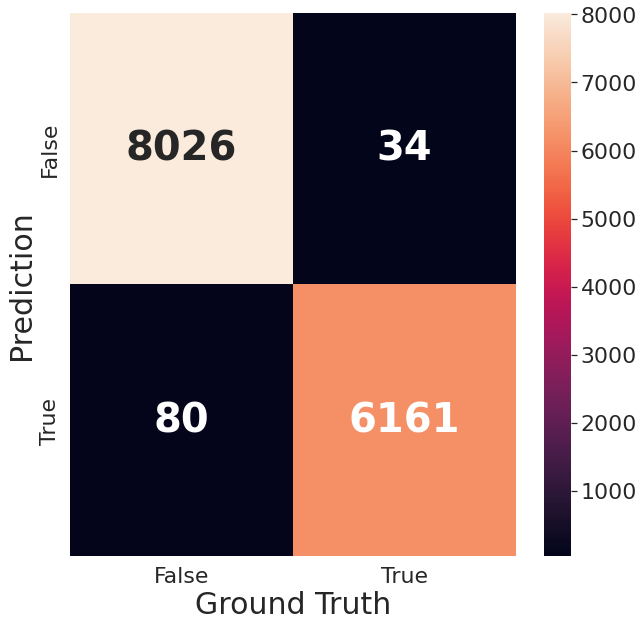

In [22]:
# sns.set_context('talk')
sns.set(font_scale=2)
cm = confusion_matrix(y_predict,y_test)
_, ax = plt.subplots(figsize=(10,10))
labels = ['False','True']
ax = sns.heatmap(cm, annot=True, fmt='d', annot_kws={"size": 40, "weight": "bold"},xticklabels=labels,yticklabels=labels)

ax.set_ylabel('Prediction', fontsize=30);
ax.set_xlabel('Ground Truth', fontsize=30)
plt.show()

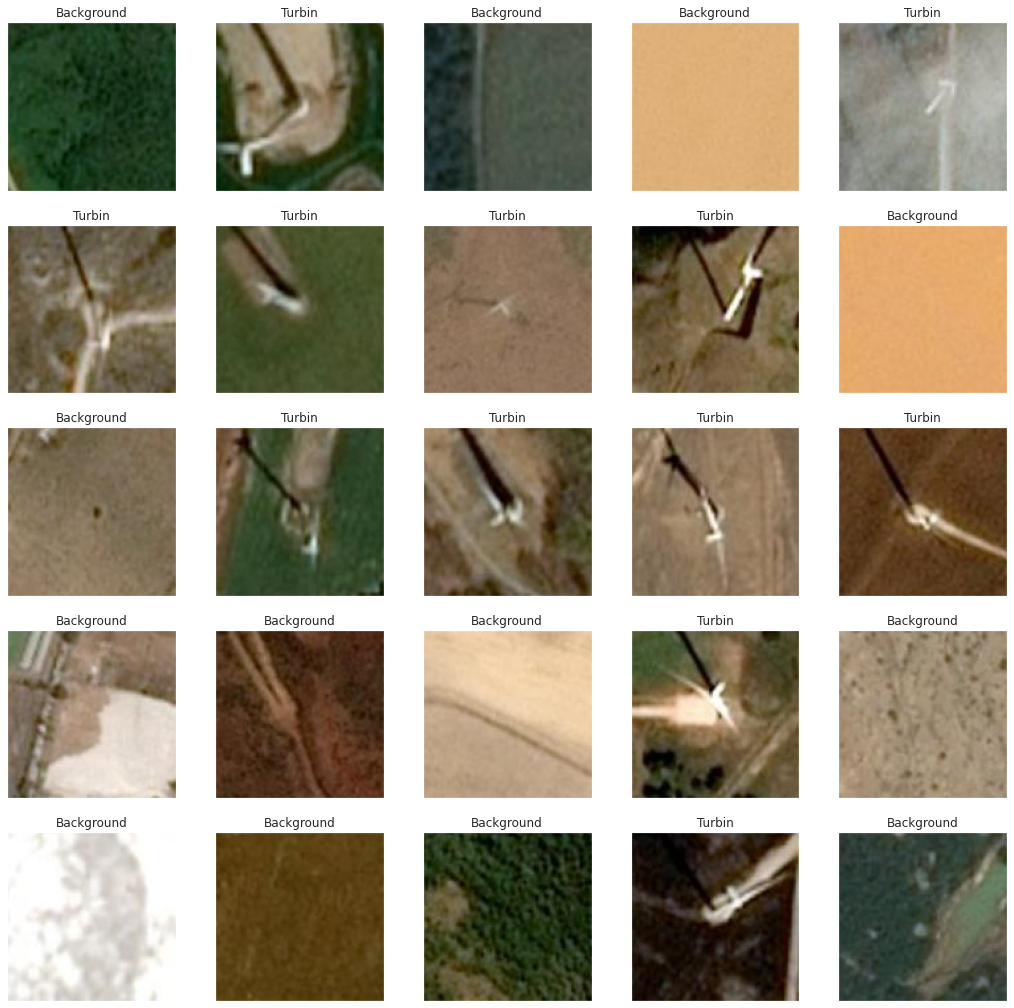

In [27]:
sns.set(font_scale=1)
with torch.no_grad():
    plt.figure(figsize=(18,18))
    for i, j in enumerate(sample(range(0, 14301), 50)):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        code = torch.round(train_model(test_data[j][0].unsqueeze(0))).to('cpu').numpy()
        plt.imshow(np.moveaxis(test_data[j][0].cpu().detach().numpy(),0,-1))
        if code == 1:
            plt.title('Turbin')
        else:
            plt.title('Background')
        if i==24:
            break